In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as pf
import warnings
from astropy.table import Table, vstack
from scipy.ndimage.filters import median_filter as median_filter
import desispec.io
import desispec.coaddition
warnings.filterwarnings('ignore')

In [2]:
def extracting_spectrum(targetid, tileid, paddleid,subset):
    directory = '/global/cfs/cdirs/desi/spectro/redux/cascades/tiles/'+str(tileid)+'/'+str(subset)+'/'
    filename = 'coadd-'+str(paddleid)+'-'+str(tileid)+'-'+str(subset)+'.fits'
    coadd = desispec.io.read_spectra(directory+filename)
    combine = desispec.coaddition.coadd_cameras(coadd)
    index = []
    for i in range(0,len(targetid)):
        index.append(np.where(np.array(coadd.fibermap['TARGETID'])==targetid[i])[0][0])
    print(index)
    return combine.wave,combine.flux['brz'][np.array(index)],combine.ivar['brz'][np.array(index)]

In [3]:
dz_not_good_catalog = pd.read_csv('ELG_dz_not_good_catalog.csv')

In [4]:
dz_not_good_catalog

Unnamed: 0           TARGETID    Z_deep subset_deep  TILEID_deep  \
0           685  39627640570643410  1.481620     b'deep'        80605   
1           691  39627640570643410  1.481620     b'deep'        80605   
2           692  39627640570643410  1.481620     b'deep'        80605   
3          2837  39627640553868904  1.475943     b'deep'        80605   
4          2842  39627640553868904  1.475943     b'deep'        80605   
..          ...                ...       ...         ...          ...   
466      470202  39633297348755667  1.095778     b'deep'        80712   
467      471563  39633311714250342  0.678450     b'deep'        80712   
468      471567  39633311714250342  0.678450     b'deep'        80712   
469      472136  39633308174257502  1.513376     b'deep'        80712   
470      472600  39633301001997047  1.369392     b'deep'        80712   

     DELTACHI2_deep  EFFTIME_DARK_deep  FIBERFLUX_R  FIBERFLUX_Z       EBV  \
0        266.527879        7018.350250     0.199568     0.336862  0.030648   
1        266.527879        7018.350250     0.199568     0.336862  0.030648   
2        266.527879        7018.350250     0.199568     0.336862  0.030648   
3        113.718209        7018.350250     0.217577     0.535684  0.024772   
4        113.718209        7018.350250     0.217577     0.535684  0.024772   
..              ...                ...          ...          ...       ...   
466      119.833581        3060.184937     0.622473     1.050845  0.008472   
467      449.138419        3060.184937     0.542535     1.160397  0.010157   
468      449.138419        3060.184937     0.542535     1.160397  0.010157   
469       53.056535        3060.184937     0.148531     0.196524  0.011354   
470       37.998950        3060.184937     0.381599     0.633194  0.007678   

     ...    FOII_short  FOII_ERR_short  FIBER_short            RZR_short  \
0    ...  1.316684e-16    3.126150e-17          452  b'single_exposures'   
1    ...  1.537559e-16    2.762383e-17          452                 b'N'   
2    ...  1.133720e-16    1.939824e-17          452                 b'N'   
3    ...  5.303118e-17    9.911056e-18          533  b'single_exposures'   
4    ...  4.795050e-17    6.355959e-18          533                 b'N'   
..   ...           ...             ...          ...                  ...   
466  ...  4.276294e-16    6.811744e-17         1329                 b'N'   
467  ...  6.977880e-17    6.528938e-18         3134  b'single_exposures'   
468  ...  6.977880e-17    6.528938e-18         3134                 b'N'   
469  ...  2.769534e-16    5.627093e-17         3617                 b'N'   
470  ...  3.277771e-16    5.457201e-17         4368                 b'N'   

           dz  zfibermag  rfibermag OII_SN_deep  OII_SN_short  VI_selection  
0    0.045337  23.644257  24.183418   19.160942      4.211839             0  
1    0.045335  23.644257  24.183418   19.160942      5.566060             0  
2    0.045340  23.644257  24.183418   19.160942      5.844446             0  
3    0.273544  23.147730  24.102337   20.360455      5.350709             0  
4    0.273541  23.147730  24.102337   20.360455      7.544180             0  
..        ...        ...        ...         ...           ...           ...  
466  0.192490  22.435894  22.996359   12.192644      6.277827             0  
467  0.075376  22.326183  23.141941    8.246653     10.687618             0  
468  0.075376  22.326183  23.141941    8.246653     10.687618             0  
469  0.005659  24.252714  24.545880    5.223611      4.921785             0  
470  0.054719  22.986858  23.529360    4.510077      6.006323             0  

[471 rows x 32 columns]

In [5]:
new_cut_catalog = dz_not_good_catalog[(dz_not_good_catalog['DELTACHI2_deep']>15) & (dz_not_good_catalog['DELTACHI2_short']>10) & (dz_not_good_catalog['RZR_short']=="b'N'")]

In [6]:
tileid_set = list(set(new_cut_catalog['TILEID_deep']))

In [7]:
all_tileid = np.array(new_cut_catalog['TILEID_deep'])

In [8]:
number_tileid = {}
for i in tileid_set:
    search = np.where(all_tileid==i)
    number_tileid[i]=len(search[0])

In [9]:
number_tileid

{80669: 5,
 80673: 5,
 80675: 13,
 80676: 4,
 80677: 4,
 80678: 1,
 80679: 4,
 80680: 4,
 80681: 11,
 80682: 5,
 80683: 3,
 80685: 6,
 80686: 1,
 80688: 2,
 80689: 2,
 80690: 4,
 80692: 2,
 80693: 15,
 80694: 2,
 80699: 4,
 80701: 13,
 80705: 15,
 80707: 6,
 80709: 3,
 80711: 7,
 80712: 5,
 80605: 6,
 80606: 11,
 80608: 26,
 80609: 3,
 80610: 16,
 80620: 2,
 80621: 3,
 80623: 2}

In [12]:
flux_matrix = np.zeros((100,7781,2))
for i in range(0,100):
    td = [np.array(new_cut_catalog['TARGETID'])[i]]
    tileid = np.array(new_cut_catalog['TILEID_deep'])[i]
    paddeid = np.array(new_cut_catalog['FIBER_deep'])[i] // 500
    subset_deep = str(np.array(new_cut_catalog['subset_deep'])[i])[2:-1]
    subset_short = str(np.array(new_cut_catalog['subset_short'])[i])[2:-1]

    output_deep = extracting_spectrum(td,tileid,paddeid, subset_deep)
    output_short = extracting_spectrum(td,tileid,paddeid, subset_short)
    flux_matrix[i,:,0]=output_deep[1][0]
    flux_matrix[i,:,1]=output_short[1][0]
    print(i)
print('Done')
hdu_spectra = pf.PrimaryHDU(flux_matrix)
hdu_wave = pf.ImageHDU(output_short[0]['brz'])
hdulist = pf.HDUList([hdu_spectra,hdu_wave])
hdulist.writeto('Problematic_spectra_ELG.fits',clobber=True)

INFO:spectra.py:253:read_spectra: iotime 0.582 sec to read coadd-0-80605-deep.fits at 2021-03-30T22:58:58.358482
[113]
INFO:spectra.py:253:read_spectra: iotime 0.541 sec to read coadd-0-80605-20201215.fits at 2021-03-30T22:59:06.961267
[113]
0
INFO:spectra.py:253:read_spectra: iotime 0.570 sec to read coadd-0-80605-deep.fits at 2021-03-30T22:59:15.830495
[113]
INFO:spectra.py:253:read_spectra: iotime 0.494 sec to read coadd-0-80605-20201216.fits at 2021-03-30T22:59:23.940491
[113]
1
INFO:spectra.py:253:read_spectra: iotime 0.580 sec to read coadd-1-80605-deep.fits at 2021-03-30T22:59:32.019892
[16]
INFO:spectra.py:253:read_spectra: iotime 0.595 sec to read coadd-1-80605-20201216.fits at 2021-03-30T22:59:40.342958
[16]
2
INFO:spectra.py:253:read_spectra: iotime 0.543 sec to read coadd-2-80605-deep.fits at 2021-03-30T22:59:48.536028
[165]
INFO:spectra.py:253:read_spectra: iotime 0.586 sec to read coadd-2-80605-20210130.fits at 2021-03-30T22:59:56.934200
[165]
3
INFO:spectra.py:253:read_s

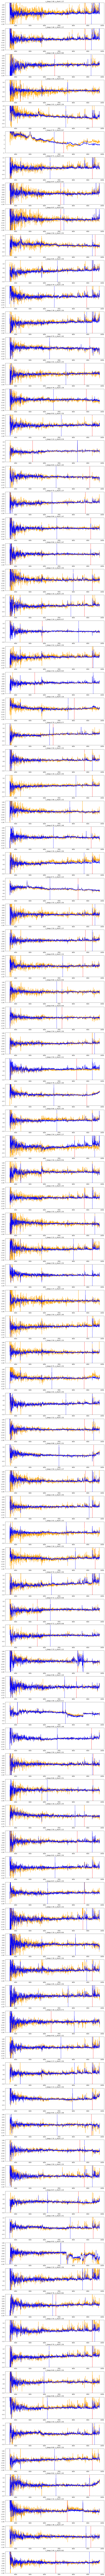

In [19]:
plt.figure(figsize=(15,400))
for index in range(0,100):
    plt.subplot(100,1,index+1)
    plt.plot(output_short[0]['brz'],median_filter(flux_matrix[index,:,1],11),color='orange')
    plt.plot(output_deep[0]['brz'],median_filter(flux_matrix[index,:,0],11),color='b')
    plt.title('z_deep:%0.2f, z_short:%0.2f' % ((np.array(new_cut_catalog['Z_deep'])[index]),np.array(new_cut_catalog['Z_short'])[index]))
    plt.axvline(3728*(1.+(np.array(new_cut_catalog['Z_deep'])[index])),ls='--',color='b',lw=2,zorder=1)
    plt.axvline(3728*(1.+(np.array(new_cut_catalog['Z_short'])[index])),ls='--',color='r',lw=2,zorder=0)
    plt.ylim(-1,2*np.median(median_filter(flux_matrix[index,:,0],11))+1)